# <a href= "http://interactivepython.org/runestone/static/pythonds/SortSearch/toctree.html"> Chapter 5: Searching and Sorting </a>

In [46]:
3

3

<h2>
   <a href= "https://yongdanielliang.github.io/animation/animation.html"> Sequential Search </a>
</h2>

<div class="binarySearch">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/search.sequential.png" height="400" width="400"  />
        <figcaption style="text-align:center;"> Sequential Search  </figcaption>
    </figure>
    </div> 
    
</div>

In [47]:
def orderedSequentialSearch(alist, item):# The given list is sorted already
    pos = 0
    found = False
    stop = False
    while pos < len(alist) and not found and not stop:
        if alist[pos] == item:
            found = True
        else:
            if alist[pos] > item:    
                stop = True
            else:
                pos = pos+1

    return found

testlist = [0,1,2,8,13,17,19,32,42,]
assert not orderedSequentialSearch(testlist,3)
assert orderedSequentialSearch(testlist,13)

<h2>
   <a href= "https://yongdanielliang.github.io/animation/web/BinarySearchNew.html"> Binary Search </a>
</h2>

<div class="binarySearch">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/binary.search.png" height="400" width="400"  />
        <figcaption style="text-align:center;"> Binary Search  </figcaption>
    </figure>
    </div>
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/binary.search.runtime.png" height="400" width="400"  />
        <figcaption style="text-align:center;">  Binary Search Time Complexity </figcaption>
    </figure>
    </div> 
    
</div>

In [48]:
def binarySearch_iterative(alist, item):
    first = 0
    last = len(alist)-1
    found = False

    while first<=last and not found:
        midpoint = (first+last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1

        return found

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
assert not binarySearch_iterative(testlist, 3)
assert binarySearch_iterative(testlist, 13)


In [49]:
L=[]
def binarySearch_recursive(alist,item):
    global L
    if len(alist) == 0:
        print (L); L=[]
        return False
    else:
        midpoint = len(alist)//2
        x = alist[midpoint]
        L.append(x)
        if x  == item: 
            print (L);
            return True
        else:
            if item < x:
                return binarySearch_recursive(alist[:midpoint], item)
            else:
                return binarySearch_recursive(alist[midpoint+1:], item)

testlist = [0, 1, 2, 8, 13, 17, 19, 32, 42,]
assert not binarySearch_recursive(testlist, 3)
assert binarySearch_recursive(testlist, 13)


[13, 2, 8]
[13]


In [50]:
testlist = [3, 5, 6, 8, 11, 12, 14, 15, 17, 18]
assert binarySearch_recursive(testlist, 8)
assert not binarySearch_recursive(testlist, 16)

[13, 12, 6, 11, 8]
[13, 12, 6, 11, 8, 12, 17, 15]


<h2> Exercise 5.1 </h2> 
Set up a random experiment to test the difference between 
a sequential search and a binary search on a list of integers.

In [51]:
# Some sample lists
t1 = [0.7,0.8,0.8,0.9,0.8,0.7,0.6,0.9,1.0,0.9]
t2 = [0.2,0.3,0.1,0.0,0.2,0.1,0.3,0.1,0.2,0.1]
t1 = [1.1968368830000031, 1.9966203099999973, 2.8975146900000084, 4.372926360000008, 6.257576311000008, 7.391333242000002, 8.282126492000003, 8.50964889300002, 8.854860133999978, 10.486078066999994]
t2 = [0.00017810800000006566, 0.0001939459999960036, 0.00020004099999937353, 0.00018739300000447656, 0.00018501899999989746, 0.00019536300001732343, 0.00019930700000259094, 0.00019231199999580895, 0.00019579000002067914, 0.00024735599998848556]


In [52]:
from timeit import Timer
import random as r

def sequentialSearch(alist, item):
	pos = 0
	found = False

	while pos < len(alist) and not found:
		if alist[pos] == item:
			found = True
		else:
			pos = pos + 1
	return found

def binarySearch_iterative(alist, item):
    first = 0
    last = len(alist)-1
    found = False

    while first<=last and not found:
        midpoint = (first+last)//2
        if alist[midpoint] == item:
            found = True
        else:
            if item < alist[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1

        return found

seq_search = Timer("sequentialSearch(lis, r.choice (lis)) ", "from __main__ import sequentialSearch, lis,r")
bin_search = Timer("binarySearch_iterative(lis, r.choice (lis)) ", "from __main__ import binarySearch_iterative, lis,r")

n = inc = 1000
print("%8s: %15s %15s " %("index", "seq_search", "bin_search" ))
num_repeats = 200
t1 = []
t2 = []
for j in range(10):
    lis = list(range(n))
    k = r.choice (lis)
    time_seq_search = seq_search.timeit(number=num_repeats)
    time_bin_search = bin_search.timeit(number=num_repeats)
    t1.append (time_seq_search)
    t2.append (time_bin_search)

    print("%8d: %15.5f %15.5f " %(n, time_seq_search, time_bin_search  ))
    n += inc
#print ( t1)
#print (t2)

   index:      seq_search      bin_search 
    1000:         0.02846         0.00035 
    2000:         0.06135         0.00055 
    3000:         0.09702         0.00036 
    4000:         0.12804         0.00036 
    5000:         0.23381         0.00044 
    6000:         0.31604         0.00035 
    7000:         0.30317         0.00068 
    8000:         0.30303         0.00074 
    9000:         0.26481         0.00046 
   10000:         0.31600         0.00039 


In [53]:
import matplotlib.pyplot as plt


# Make a figure
fig = plt.figure()

# Make room for legend at bottom
fig.subplots_adjust(bottom=0.2)

# The axes for your lists 1-2
ax1 = fig.add_subplot(111)


# Plot lines 
line1 = ax1.plot(t1,'bo-',label='sequential')  # plot t1
line2 = ax1.plot(t2,'go-',label='binary')      # plot t2


# To get lines 1-2 on the same legend, we need to 
# gather all the lines together before calling legend
lines = line1+line2
labels = [l.get_label() for l in lines]

# giving loc a tuple in axes-coords. ncol=5 for 5 columns
ax1.legend(lines, labels, loc=(0,-.4), ncol=5)

#ax1.set_xlabel('events')

# Display the figure
plt.show()

<Figure size 640x480 with 1 Axes>

<h2><a href= "http://interactivepython.org/runestone/static/pythonds/SortSearch/Hashing.html#implementing-the-map-abstract-data-type"> 5.5 Hash Functions/Collision Resolution </a> </h2>

Our goal is to create a hash function that 

* minimizes the number of collisions, 
* is easy to compute, and 
* evenly distributes the items in the hash table. 


<div class="hashfunction">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/hash.function.0.png" height="500" width="500"  />
        <figcaption style="text-align:center;"> Hash Function for hash table of size 11 </figcaption>
    </figure>
    </div>
 
</div>

In [63]:
#listing 1
def hash(astring, tablesize):
    sum = 0
    for pos in range(len(astring)):
        sum += ord(astring[pos])
    return sum%tablesize
print(hash('abba', 11))
print(hash('aabb', 11))

5
5


<div class="hashfunction">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/hash.function.png" height="500" width="500"  />
        <figcaption style="text-align:center;"> Remedy: use the positional value as a weighting factor </figcaption>
    </figure>
    </div>
 
</div>

In [62]:
def hash(s, tablesize):
    sum = 0
    i = 1
    for x in s:
        sum +=  i * ord( x )
        i += 1

    return sum%tablesize

print(hash('abba', 11))
print(hash('aabb', 11))
# find two differnt strings that will have the same hash value

7
9


<h1> Collision Resolution   <a href= "https://yongdanielliang.github.io/animation/animation.html"> (animation) </a> </h1>

When two items hash to the same slot, we must have a systematic method for placing the second item in the hash table. This process is called collision resolution.

<ul>
    <li> <bf>Open addressing</bf>: find the next open slot or address in the hash table. </li>
    <ul>
        <li> Hashing Using Linear Probing  <a href= "https://yongdanielliang.github.io/animation/web/LinearProbing.html"> (animation)  </a> </li>
        <li> Hashing Using Quadratic Probing  <a href= "https://yongdanielliang.github.io/animation/web/QuadraticProbing.html
">  (animation)  </a> </li>
    </ul>
  </ul>


<div class="hashfunction">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/linear.probing.png" height="500" width="500"  />
        <figcaption style="text-align:center;"> linear probing: (54,26,93,17,77,31,44,55,20) hash(x)=x%11 </figcaption>
    </figure>


</div>
 
</div>

In [56]:
                  0    1    2    3    4    5    6    7    8    9   10
 0: (add 54)      0    0    0    0    0    0    0    0    0    0   54
 1: (add 26)      0    0    0    0   26    0    0    0    0    0   54
 2: (add 93)      0    0    0    0   26   93    0    0    0    0   54
 3: (add 17)      0    0    0    0   26   93   17    0    0    0   54
 4: (add 77)     77    0    0    0   26   93   17    0    0    0   54
 5: (add 31)     77    0    0    0   26   93   17    0    0   31   54
 6: (add 44)     77   44    0    0   26   93   17    0    0   31   54
 7: (add 55)     77   44   55    0   26   93   17    0    0   31   54
 8: (add 20)     77   44   55   20   26   93   17    0    0   31   54

SyntaxError: invalid syntax (<ipython-input-56-a6023db6de7e>, line 1)

<div class="hashfunction">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/rehash.plus.3.png" height="500" width="500"  />
        <figcaption style="text-align:center;"> "plus 3" rehash: (54,26,93,17,77,31,44,55,20) rehash(x,k)=(hash(x)+3*k)%11               </figcaption>
    </figure>
   </div>
 </div>

In [ ]:
                  0    1    2    3    4    5    6    7    8    9   10
 0: (add 54)      0    0    0    0    0    0    0    0    0    0   54
 1: (add 26)      0    0    0    0   26    0    0    0    0    0   54
 2: (add 93)      0    0    0    0   26   93    0    0    0    0   54
 3: (add 17)      0    0    0    0   26   93   17    0    0    0   54
 4: (add 77)     77    0    0    0   26   93   17    0    0    0   54
 5: (add 31)     77    0    0    0   26   93   17    0    0   31   54
 6: (add 44)     77    0    0   44   26   93   17    0    0   31   54
 7: (add 55)     77   55    0   44   26   93   17    0    0   31   54
 8: (add 20)     77   55    0   44   26   93   17   20    0   31   54

<div class="hashfunction">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/quadratic.probing.png" height="500" width="500"  />
        <figcaption style="text-align:center;"> "quadratic probing: (54,26,93,17,77,31,44,55,20)  rehash(x,k)=(hash(x)+k*k)%11             </figcaption>
    </figure>
</div> 
</div>

In [ ]:
                  0    1    2    3    4    5    6    7    8    9   10
 0: (add 54)      0    0    0    0    0    0    0    0    0    0   54
 1: (add 26)      0    0    0    0   26    0    0    0    0    0   54
 2: (add 93)      0    0    0    0   26   93    0    0    0    0   54
 3: (add 17)      0    0    0    0   26   93   17    0    0    0   54
 4: (add 77)     77    0    0    0   26   93   17    0    0    0   54
 5: (add 31)     77    0    0    0   26   93   17    0    0   31   54
 6: (add 44)     77   44    0    0   26   93   17    0    0   31   54
 7: (add 55)     77   44    0   55   26   93   17    0    0   31   54
 8: (add 20)     77   44   20   55   26   93   17    0    0   31   54

In [ ]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
    def __len__ (self):
        return self.size
    
    def printList(self, data):
        s = ""
        for x in data:
            if x==None:
                x = 0
            s += "{0:5d}".format (x)
        return s
        
    def __str__ (self ):
        return self.printList(self.data)
    
    def put(self,key,data):
        startslot = self.hashfunction(key, self.size)
        for k in range (0, self.size):
            position = self.rehash(startslot, k)
            if k>0 and position==startslot:
                return False
            if self.slots[position] == key: # replace
                self.data[position] = key
                return True
            elif self.slots[position] == None: #add 
                self.slots[position] = key
                self.data[position] = key
                return True

                    
    def hashfunction(self,key,size):
        return key%size

    #def rehash(self,oldhash,size): #xxx linear probing with a “plus 1” rehash function.
    #    return (oldhash+1)%size # 

    def rehash(self,oldhash, k):
        size = self.size
        #return (oldhash+3*k)%size   # linear probling: plus 3
        return (oldhash+k*k)%size   # quadratic  probling    
    
    def get(self,key):
        startslot = self.hashfunction(key, self.size)
        for k in range (0, self.size):
            position = self.rehash(startslot, k)
            if self.slots[position] == key:
                return self.data[position]
            elif  k>0 and position==startslot:
                return None
            elif self.slots[position] == None:
                return None

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)


def self_check_Q38 ( A ):
    H=HashTable(); 
    i = 0
    L= list ( range(len(H)))
    for x in  A:
        H[x] = x    # add x to the hash table
        s = "{0:2}: (add {1:2}) ".format(i, x)
        if i==0:
            print ( " "*len(s), H.printList(L) )
        print (s,  H )
        i += 1
    


A = (113 , 117 , 97 , 100 , 114 , 108 , 116 , 105 , 99) # self_check_Q38
B = (54,26,93,17,77,31,44,55,20)
self_check_Q38( B )

<h1> Map abstract data type. </h1>
<p>
The structure is an unordered collection of associations between a key and a data value. 
The keys in a map are all unique so that there is a one-to-one relationship between a key and a value. 
The operations are given below.
</p>
<ul>
    <li> Map() Create a new, empty map. It returns an empty map collection. </li>
<li> put(key,val) Add a new key-value pair to the map. If the key is already in the map then replace the old value with the new value.</li>
<li> get(key) Given a key, return the value stored in the map or None otherwise.</li>
<li> del Delete the key-value pair from the map using a statement of the form del map[key].</li>
<li> len() Return the number of key-value pairs stored in the map.</li>
<li> in Return True for a statement of the form key in map, if the given key is in the map, False otherwise.</li>
    </ul>



<h2><a href= "http://interactivepython.org/runestone/static/pythonds/SortSearch/Hashing.html#implementing-the-map-abstract-data-type"> 5.5.3. Implementation of the Map abstract data type. </a> </h2>



<ul>
<li> Sequential:  O(n)</li>
<li> Binary search: O(log n)  </li>
<li> Hash table: O(1) </li>
</ul>


# Map.py

In [ ]:
class MyMap:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
    # Exercise:  Dealing with the situation where there are no empty slots left.
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots))

        if self.slots[hashvalue] == None:  # find empty slot
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else:
            if  self.slots[hashvalue] == key:
                self.data[hashvalue] = data #replace
            else:
                nextslot = self.rehash(hashvalue,len(self.slots))
                # xxx need to deal with the situation where the table is full
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot,len(self.slots))

                if self.slots[nextslot] == None: # add a new item to the hash table
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                else:
                    self.data[nextslot] = data   # replace the old data with current

    def hashfunction(self,key,size):
        return key%size

    def rehash(self,oldhash,size): # Linear probe
        return (oldhash+1)%size

    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots))

        data = None
        stop = False
        found = False
        position = startslot
        while self.slots[position] != None and not found and not stop:
                if self.slots[position] == key:
                    found = True
                    data = self.data[position]
                else:
                    position=self.rehash(position,len(self.slots))
                    if position == startslot:
                        stop = True
        return data

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)


def bar ():
    H=MyMap()
    A = (54,26,93,17,77,31,44,55,20)
    B = ("cat", "dog", "lion", "tiger", "bird", "cow", "goat", "pig", "chicken" )
    assert  (len(A)==len(B))
    for i in range ( len(A) ):
         H[A[i]] = B[i]
    print("slots =", H.slots)
    print("data =", H.data)
    assert(H[17]=="tiger")
    assert(H[20]=="chicken")
    H[20] = 'duck'
    assert(H[20]=="duck")
    print("new data =", H.data)
    assert(H[99]==None)
bar()


<h1>Class Exercises: </h1> <h2> Implement the following for the hash table Map ADT implementation. </h2>
<ul> 
  <li>  len method (__len__)</li>
  <li> in method (__contains__)</li>
  <li> del method using the following for collision resolution</li>
  <ul>
         <li>  chaining </li>
         <li> open addressing with quadratic probing</li>
  </ul>
          
</ul>


<div class="image123">
    <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/hash.chaining.png" height="600" width="600"  />
        <figcaption style="text-align:center;">Chaining Hash Table </figcaption>
    </figure>
    </div>
 
</div>

In [ ]:
class HashTable:
    def __init__(self):
        self.occupied = 0    # for the len method ( __len__ )
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def __len__ ( self ):    #  len method (__len__)
        return self.occupied
    
    def capacity(self):
        return len(self.slots)
    
    def __contains__ (self,key): # xxx
        return self[key] != None
    
    def put(self,key,data):
                x, nextslot = self.get(key)
                if self.slots[nextslot] == None:
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                    self.occupied += 1
                elif self.slots[nextslot]==key:
                    self.data[nextslot] = data #replace
                else:
                    print ("fail to insert", data)

    def hashfunction(self,key,size):
        return key%size

    def rehash(self,oldhash, k):
        size = len (self.slots)
        #return (oldhash+k)%size   # linear probling
        return (oldhash+k*k)%size   # quartic  probling

    def get(self,key):
        startslot = self.hashfunction(key,self.capacity())

        data = None
        stop = False
        found = False
        position = startslot
        k=1
        while self.slots[position] != None and not found and not stop:
                if self.slots[position] == key:
                    found = True
                    data = self.data[position]
                else:
                    position=self.rehash(startslot, k )
                    if position == startslot:
                        stop = True
                k += 1;
        return data, position

    def __getitem__(self,key):
        data, position = self.get(key)
        return data
    
    def __contain__(self,key):
        return self[key] != None
    
    def __setitem__(self,key,data):
        self.put(key,data)

def test1 ():
    H=HashTable()
    A = (54,26,93,17,77,31,44,55,20)
    B = ("cat", "dog", "lion", "tiger", "bird", "cow", "goat", "pig", "chicken" )
    assert  (len(A)==len(B))
    for i in range ( len(A) ):
         H[A[i]] = B[i]
    for k in A:
        assert k in H

    assert H[20] == "chicken"
    assert H[17] == "tiger"
    assert len(H)==9
    print("H.slots: ", H.slots)
    print("H.data: ", H.data)
    H[20] = 'duck'
    H[10] = "horse"

    assert H[99]==None
    assert not 99 in H
    assert len(H)==10
    print("H.slots: ", H.slots)
    print("H.data: ", H.data)
test1()

<h1>Class Exercises: </h1> <h2> Implement the following for the hash table Map ADT implementation. </h2>
<ul> 
  <li> del method using the following for collision resolution</li>
  <ul>
         <li>  chaining </li>
  </ul>
          
</ul>


In [ ]:
class HashTable:
    def __init__(self):
        self.occupied = 0 
        self.size = 11
        self.pairs = []
        for i in range ( self.size):
            self.pairs.append ( [] )
        
    def __str__ ( self ):
        s = ""
        for x in self.pairs:
            s += str (x)+ " ";
        return s 
    
    def __len__ ( self ):
        return self.occupied
    
    def capacity(self):
        return len(self.pairs)    

    def __contains__ (self,key): # xxx
        return self[key] != None

    def put(self,key,data):
        hashvalue = self.hashfunction(key,self.capacity())
        found = False
        for x in self.pairs[hashvalue]:
            if  x[0] == key:
                x[1] = data   # xxx replace an old item
                found = True
                break
        if not found:           # xxx add new item
            self.occupied += 1
            self.pairs[hashvalue].append( [key,data])
            
    def __delitem__ (self,key):  # del()
        hashvalue = self.hashfunction(key,self.capacity())
        found = False
        for x in self.pairs[hashvalue]:
            if  x[0] == key:
                self.pairs[hashvalue].remove  (x)
                found = True
                self.occupied -= 1
                break
        return found
            

    def hashfunction(self,key,size):
        return key%size


    def get(self,key):
        hashvalue = self.hashfunction(key,self.capacity())
        found = False
        for x in self.pairs[hashvalue]:
            if x[0] == key:
                return x[1]
        if not found:
            return None

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)


H=HashTable()

A = (54,26,93,17,77,31,44,55,20)
B = ("cat", "dog", "lion", "tiger", "bird", "cow", "goat", "pig", "chicken" )
assert  (len(A)==len(B))
for i in range ( len(A) ):
     H[A[i]] = B[i]
     
print("H: ", H)
for i in range ( len(A) ):
     assert H[A[i]] == B[i]

H[20] = 'duck'
assert H[20]=="duck"

H[0] = "horse"
assert H[99]==None
assert not 99 in H
assert len(H)==10
del H[54]  
assert len(H)==len(A)
print("H: ", H)


<h1> Sorting </h1>
<h2> Incremental approach O(n<sup>2</sup>): </h2>
<ul>
            <li>  <a href='http://interactivepython.org/runestone/static/pythonds/SortSearch/TheInsertionSort.html
'> 5.9  The Insertion Sort </a> </li>
            <li>  <a href='http://interactivepython.org/runestone/static/pythonds/SortSearch/TheSelectionSort.html'> 5.8  The Selection Sort </a> </li>
   <li>  <a href='http://interactivepython.org/runestone/static/pythonds/SortSearch/TheBubbleSort.html
    '> 5.7  The Bubble Sort </a> </li>
        <li>  <a href='http://interactivepython.org/runestone/static/pythonds/SortSearch/TheShellSort.html'> 
5.10  The Shell Sort </a> </li>

</ul> 



<h2>  Divided-and-Conquer approach O(nlog n) </h2>
<ul>
    <li>  <a href='
http://interactivepython.org/runestone/static/pythonds/SortSearch/TheMergeSort.html
        '> 5.11  The Merge Sort </a> </li>
     <li> <a href='
http://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html
        '> 5.12  The  Quick Sort </a> </li>
</ul> 


<div class="image123">
    <div style="float:left;margin-top:5px;">
        <figure>
            <img src="images/insertion.sort.1.png" width="400"  />
            <figcaption style="text-align:center;">Insertion Sort </figcaption>
        </figure>
    </div>
    <div style="float:left;margin-top:5px;">
        <figure>
            <img src="images/insertion.sort.2.png"  width="400"  />
            <figcaption style="text-align:center;">Insertion Sort </figcaption>
        </figure>
    </div>
</div>

In [58]:
def traceSorting (alist, i, j):
    print (i, end=": ")
    for k in range(0, len(alist) ):
        s = "{0:3}".format(alist[k])
        if k==i:
            s += "*"
        elif k==j:
            s += "-"
        else:
            s += " "
        print (s, end="")
    print ()

def insertionSort(alist):
  print ("Insertion sort: ")
  traceSorting (alist, 0,0)
  for i in range(1,len(alist)):
    x = alist[i]
    j = i
    while j>0 and alist[j-1]>x:
      alist[j]=alist[j-1]
      j -= 1
    alist[j] = x
    traceSorting(alist, i,j)

a=[7, 2,9, 3,4,10, 5,1, 6,8]  # Q4
b=[10,9,8,7,6,5,4,3,2,1]      #Q5
c=[1,2,3,4,5,6,7,8,9,10]      #Q6
d=['P','Y','T','H','O','N']   #Q7
for s in [a,b,c,d]:
    insertionSort(s)
    assert ( s==sorted(s))
    for i in range (1,len(s)):
        assert s[i-1] <= s[i] 


Insertion sort: 
0:   7*  2   9   3   4  10   5   1   6   8 
1:   2-  7*  9   3   4  10   5   1   6   8 
2:   2   7   9*  3   4  10   5   1   6   8 
3:   2   3-  7   9*  4  10   5   1   6   8 
4:   2   3   4-  7   9* 10   5   1   6   8 
5:   2   3   4   7   9  10*  5   1   6   8 
6:   2   3   4   5-  7   9  10*  1   6   8 
7:   1-  2   3   4   5   7   9  10*  6   8 
8:   1   2   3   4   5   6-  7   9  10*  8 
9:   1   2   3   4   5   6   7   8-  9  10*
Insertion sort: 
0:  10*  9   8   7   6   5   4   3   2   1 
1:   9- 10*  8   7   6   5   4   3   2   1 
2:   8-  9  10*  7   6   5   4   3   2   1 
3:   7-  8   9  10*  6   5   4   3   2   1 
4:   6-  7   8   9  10*  5   4   3   2   1 
5:   5-  6   7   8   9  10*  4   3   2   1 
6:   4-  5   6   7   8   9  10*  3   2   1 
7:   3-  4   5   6   7   8   9  10*  2   1 
8:   2-  3   4   5   6   7   8   9  10*  1 
9:   1-  2   3   4   5   6   7   8   9  10*
Insertion sort: 
0:   1*  2   3   4   5   6   7   8   9  10 
1:   1   2*  3   4   5   

<div class="image123">
    <div style="float:left;margin-top:55px;">
        <figure>
            <img src="images/selection.sort.png" height="300" width="300"  />
            <figcaption style="text-align:center;">selection Sort </figcaption>
        </figure>
    </dev>

</div>

In [64]:
def selectionSort(alist):
  print ("Selection Sort:")
  traceSorting (alist,0,0)
  for i in range(len(alist)-1,0,-1):
    j=i
    for k in range(0,i):
      if alist[k]>alist[j]:
        j = k 
    traceSorting (alist, i, j)
    alist[i], alist[j] = alist[j], alist[i]
a=[7, 2,9, 3,4,10, 5,1, 6,8]  # Q4
b=[10,9,8,7,6,5,4,3,2,1]      #Q5
c=[1,2,3,4,5,6,7,8,9,10]      #Q6
d=['P','Y','T','H','O','N']   #Q7
for L in [a,b,c,d]:
    selectionSort(L)


Selection Sort:
0:   7*  2   9   3   4  10   5   1   6   8 
9:   7   2   9   3   4  10-  5   1   6   8*
8:   7   2   9-  3   4   8   5   1   6* 10 
7:   7   2   6   3   4   8-  5   1*  9  10 
6:   7-  2   6   3   4   1   5*  8   9  10 
5:   5   2   6-  3   4   1*  7   8   9  10 
4:   5-  2   1   3   4*  6   7   8   9  10 
3:   4-  2   1   3*  5   6   7   8   9  10 
2:   3-  2   1*  4   5   6   7   8   9  10 
1:   1   2*  3   4   5   6   7   8   9  10 
Selection Sort:
0:  10*  9   8   7   6   5   4   3   2   1 
9:  10-  9   8   7   6   5   4   3   2   1*
8:   1   9-  8   7   6   5   4   3   2* 10 
7:   1   2   8-  7   6   5   4   3*  9  10 
6:   1   2   3   7-  6   5   4*  8   9  10 
5:   1   2   3   4   6-  5*  7   8   9  10 
4:   1   2   3   4   5*  6   7   8   9  10 
3:   1   2   3   4*  5   6   7   8   9  10 
2:   1   2   3*  4   5   6   7   8   9  10 
1:   1   2*  3   4   5   6   7   8   9  10 
Selection Sort:
0:   1*  2   3   4   5   6   7   8   9  10 
9:   1   2   3   4   5   6  

<div class="image123">
    <div style="float:left;margin-top:55px;">
        <figure>
            <img src="images/bubble.sort.1.png"  width="400"  />
            <figcaption style="text-align:center;">bubble Sort </figcaption>
        </figure>
    </div>
    <div style="float:left;margin-top:55px;">
        <figure>
            <img src="images/bubble.sort.2.png"  width="400"  />
            <figcaption style="text-align:center;">bubble Sort </figcaption>
        </figure>
    </div>
</div>

In [ ]:
def bubbleSort(L):
    print ("Bubble Sort: ")
    traceSorting (L,0,0)
    for k in range(len(L)-1,0,-1):
        traceSorting (L,k,k)
        for i in range(k):
            if L[i]>L[i+1]:
                L[i],L[i+1]=L[i+1],L[i]
a=[7, 2,9, 3,4,10, 5,1, 6,8]  # Q4
b=[10,9,8,7,6,5,4,3,2,1]      #Q5
c=[1,2,3,4,5,6,7,8,9,10]      #Q6
d=['P','Y','T','H','O','N']   #Q7
for L in [a,b,c,d]:
    bubbleSort(L)


<h2> Divided-and-Conquer approach O(nlog n)  </h2>
<ul>
    <li>  <a href='
http://interactivepython.org/runestone/static/pythonds/SortSearch/TheMergeSort.html
        '> 5.11  The Merge Sort </a> </li>
     <li> <a href='
http://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html
        '> 5.12  The  Quick Sort </a> </li>
    <li>
        <a href='https://yongdanielliang.github.io/animation/animation.html'>  Animation </a>
    </li>
</ul> 


<h1>  <center>  Merge Sort  </center>  </h1>

<div class="qsort.1">
  <div style="float:left;margin-right:55px;">
    <figure>
        <img src="images/merge.sort.1.png" height="400" width="400"  />
        <figcaption style="text-align:center;">  Merge Sort: Divide  </figcaption>
    </figure>
  </div>
  <div style="float:left;margin-right:0px;">
    <figure>
        <img src="images/merge.sort.2.png" height="400" width="400"  />
        <figcaption style="text-align:center;"> Merge Sort: Conquer  </figcaption>
    </figure>
  </div> 
</div>

 Watch 
 
 * <a href='http://cs.armstrong.edu/liang/animation/web/MergeSortOverview.html'>  Merge Sort Overview Animation </a>
 *  <a href='http://cs.armstrong.edu/liang/animation/web/MergeSortNew.html '>  Merge Sorted List Animation </a>

In [65]:
def mergeSort(alist, i=0 ):
  # print("Splitting ",alist)
  if len(alist)>1:
    mid = len(alist)//2
    lefthalf = alist[:mid]  # slicing 
    righthalf = alist[mid:]  # slicing

    mergeSort(lefthalf, i+1)
    mergeSort(righthalf, i+1)

    i=0
    j=0
    k=0
    while i<len(lefthalf) and j<len(righthalf):
      if lefthalf[i]<righthalf[j]:
        alist[k]=lefthalf[i]
        i=i+1
      else:
        alist[k]=righthalf[j]
        j=j+1
      k=k+1

    while i<len(lefthalf):
      alist[k]=lefthalf[i]
      i=i+1
      k=k+1

    while j<len(righthalf):
      alist[k]=righthalf[j]
      j=j+1
      k=k+1
  # print("Merging ",alist)

a=[7, 2,9, 3,4,10, 5,1, 6,8]  # Q4
b=[10,9,8,7,6,5,4,3,2,1]      #Q5
c=[1,2,3,4,5,6,7,8,9,10]      #Q6
d=['P','Y','T','H','O','N']   #Q7
for L in [a,b,c,d]:
    mergeSort(L)

In [66]:

def mergeSort(alist, level, first, last, A,B):
  # print("Splitting ",alist)
  ans = level
  if last==first:
    A[level][first] = alist[first]
    A[level+1][first] = alist[first]
  elif last-first>1:
    mid = (last+first)//2
    B[level+1][mid-1] = "**"
    for i in range (first,last):
        A[level+1][i] = alist[i]
    l1 = mergeSort(alist, level+1, first, mid, A, B)
    l2 = mergeSort(alist, level+1, mid, last, A, B )
    ans = max (l1,l2)
    i=first
    j=mid
    k=0
    L = [0]*(last-first)
    while i<mid and j<last:
      if alist[i]<alist[j]:
        L[k]=alist[i]
        i=i+1
      else:
        L[k]=alist[j]
        j=j+1
      k=k+1

    while i<mid:
      L[k]=alist[i]
      i=i+1
      k=k+1

    while j<last:
      L[k]=alist[j]
      j=j+1
      k=k+1
    for i in range (k):
        alist[first+i]=L[i]
        A[level][first+i] = L[i]
  return ans 

def traceMergeSort (level, n, A,B):
    for i in range (level) :
        print (i, end=": ")
        for j in range (n):
            x = A[i][j]
            if x==0:
                x=""
            else:
                x = str(x)
            print ( "{0:^2}{1:2}".format( x, B[i][j] ),  end="")
        print ()

def unitTest ():
    x = [54,26,93,17,77,31,44,55,20]
    y = [21, 1, 26, 45, 29, 28, 2, 9, 16, 49, 39, 27, 43, 34, 46, 40] 
    x = [10,9,8,7,6,5,4,3,2,1]
    
    a=[7, 2,9, 3,4,10, 5,1, 6,8]  #Q4
    b=[10,9,8,7,6,5,4,3,2,1]      #Q5
    c=[1,2,3,4,5,6,7,8,9,10]      #Q6
    d=['P','Y','T','H','O','N']   #Q7
    for z in [a,b,c,d]:
        n = len(z)
        A = []
        B = []
        C=[]
        for i in range (n):
            A.append ( [0]*n ); 
            B.append( ["  "]*n)
            C.append ( z.copy() )
        k = 1+mergeSort(z, 0, 0, n, A,B)
        A = A[:k]
        B = B[:k]
        C = C[:k]
        for i in range (k):
            for j in range (n):
                if A[i][j]==0:
                    C[i][j]=0
        assert(z==sorted(z))
        print ("Merge Sort: ")
        print ("Top-Down Partition: ")
        traceMergeSort (k, n, C,B)
        A.reverse()
        B.reverse()
        print ("Bottom-Up Merge: ")
        traceMergeSort (k, n, A,B)
        print()

unitTest()


Merge Sort: 
Top-Down Partition: 
0: 7   2   9   3   4   10  5   1   6   8   
1: 7   2   9   3   4 **10  5   1   6   8   
2: 7   2 **9   3   4   10  5 **1   6   8   
3: 7 **2   9 **3   4   10**5   1 **6   8   
4:             3 **4               6 **8   
Bottom-Up Merge: 
0:             3 **4               6 **8   
1: 7 **2   9 **3   4   10**5   1 **6   8   
2: 2   7 **3   4   9   5   10**1   6   8   
3: 2   3   4   7   9 **1   5   6   8   10  
4: 1   2   3   4   5   6   7   8   9   10  

Merge Sort: 
Top-Down Partition: 
0: 10  9   8   7   6   5   4   3   2   1   
1: 10  9   8   7   6 **5   4   3   2   1   
2: 10  9 **8   7   6   5   4 **3   2   1   
3: 10**9   8 **7   6   5 **4   3 **2   1   
4:             7 **6               2 **1   
Bottom-Up Merge: 
0:             7 **6               2 **1   
1: 10**9   8 **6   7   5 **4   3 **1   2   
2: 9   10**6   7   8   4   5 **1   2   3   
3: 6   7   8   9   10**1   2   3   4   5   
4: 1   2   3   4   5   6   7   8   9   10  

Merge Sort: 
T

<h1>  <center>  Quick Sort  </center>  </h1>

<div class="qsort.1">
  <div style="float:left;">
    <figure>
        <img src="images/qsort.1.png" height="350" width="350"  />
        <figcaption style="text-align:center;"> qsort  </figcaption>
    </figure>
  </div>
  <div style="float:left;margin-right:200px;">
    <figure>
        <img src="images/qsort.2.png" height="350" width="400"  />
        <figcaption style="text-align:center;"> qsort  </figcaption>
    </figure>
  </div> 
</div>

 Watch
 *  <a href='https://yongdanielliang.github.io/animation/web/QuickSortNew.html'>  Quick Sort Partition Animation </a>
  *  <a href='https://yongdanielliang.github.io/animation/web/QuickSortOverview.html'>  Quick Sort Overview Animation </a>

In [2]:

def quickSort(alist,d,e ):
  return quickSortHelper(alist,0,len(alist)-1, 0,d,e )
  

def quickSortHelper(alist,first,last, i, d, e):
  for j in range (first, last+1):
    d[i][j] =  alist[j]
  depth = i+1
  if first<last:
    splitpoint = partition(alist,first,last )
    for j in range (i+1,len(e)):
        e[j][splitpoint] = "*" 
    x=quickSortHelper(alist,first,splitpoint-1, i+1,d,e )
    y=quickSortHelper(alist,splitpoint+1,last, i+1,d,e )
    depth = max (x,y)
  return depth
   
def partition(alist,first,last):
  pivotvalue = alist[first]

  leftmark = first+1
  rightmark = last

  done = False
  while not done:

    while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
      leftmark = leftmark + 1

    while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
      rightmark = rightmark -1

    if rightmark < leftmark:
      done = True
    else:
      alist[leftmark], alist[rightmark]  = alist[rightmark], alist[leftmark]
  alist[first], alist[rightmark]  = alist[rightmark], alist[first]
  return rightmark
def preTrace (M):
    print ("Quick Sort: ")
    d=[]; e=[]
    n = len(M)
    for i in range ( n):
        d.append(M.copy()); 
        e.append([" "]*n)
    return d, e

def testQuickSort(L):
    n = len(L)
    d,e = preTrace ( sorted(L) );
    m = quickSort(L, d,e )
    X = list( range(m) ) + [ n-1]
    for i in range ( m):
        s = "{0:2}: ".format(i)
        print (s, end="")
        for j in range(n):
            x = d[i][j]; y = e[i][j]
            s = "{0:>2}{1:<2}".format(x,y)
            if (i!= m-1 and i>0 and e[i-1][j]=="*"):
              s = " "* len(s)  
            print ( s, end=" ")
        print ()

L = [54,26,93,17,77,31,44,55,20]
testQuickSort(L)
testQuickSort ([0,1,2,3])
testQuickSort ([4,3,2,1,0])

a=[7, 2,9, 3,4,10, 5,1, 6,8]  #Q4
b=[10,9,8,7,6,5,4,3,2,1]      #Q5
c=[1,2,3,4,5,6,7,8,9,10]      #Q6
d=['P','Y','T','H','O','N']   #Q7
for s in [a,b,c,d]:
    testQuickSort(s)


Quick Sort: 
 0: 54   26   93   17   77   31   44   55   20   
 1: 31   26   20   17   44   54*  77   55   93   
 2: 17   26   20   31*  44        55   77*  93   
 3: 17*  26   20        44        55        93   
 4: 17*  20   26*  31*  44   54*  55   77*  93   
Quick Sort: 
 0:  0    1    2    3   
 1:  0*   1    2    3   
 2:       1*   2    3   
 3:  0*   1*   2*   3   
Quick Sort: 
 0:  4    3    2    1    0   
 1:  0    3    2    1    4*  
 2:  0*   3    2    1        
 3:       1    2    3*       
 4:  0*   1*   2    3*   4*  
Quick Sort: 
 0:  7    2    9    3    4   10    5    1    6    8   
 1:  5    2    6    3    4    1    7*  10    9    8   
 2:  4    2    1    3    5*   6         8    9   10*  
 3:  3    2    1    4*        6         8*   9        
 4:  1    2    3*             6              9        
 5:  1*   2    3*   4*   5*   6    7*   8*   9   10*  
Quick Sort: 
 0: 10    9    8    7    6    5    4    3    2    1   
 1:  1    9    8    7    6    5    4    3    2   1

In [38]:
def pivot (alist, first, last):
  if last > first+1:
    L=alist[first:last+1]
    n = len(L)
    x = sorted(L)[ (n-1)//2 ]
    i = first + L.index(x)
    alist[first], alist[i] = alist[i], alist[first]

In [39]:

# used to pick a better pivot value to enable the balanced partition
def pivot (alist, first, last):  # xxx explain this function
  if last > first+1:
    L=alist[first:last+1]       
    n = len(L)
    x = sorted(L)[ (n-1)//2 ]
    i = first + L.index(x)
    alist[first], alist[i] = alist[i], alist[first]
    
def quickSort(alist,d,e ):
  return quickSortHelper(alist,0,len(alist)-1, 0,d,e )
  

def quickSortHelper(alist,first,last, i, d, e):
  for j in range (first, last+1):
    d[i][j] =  alist[j]
  depth = i+1
  if first<last:
    splitpoint = partition(alist,first,last )
    d[i] = alist.copy()
    for j in range (i+1,len(e)):
        e[j][splitpoint] = "*" 
    x=quickSortHelper(alist,first,splitpoint-1, i+1,d,e )
    y=quickSortHelper(alist,splitpoint+1,last, i+1,d,e )
    depth = max (x,y)
  return depth
   
def partition(alist,first,last):
    
  pivot (alist, first, last)

  pivotvalue = alist[first]

  leftmark = first+1
  rightmark = last

  done = False
  while not done:

    while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
      leftmark = leftmark + 1

    while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
      rightmark = rightmark -1

    if rightmark < leftmark:
      done = True
    else:
      alist[leftmark], alist[rightmark]  = alist[rightmark], alist[leftmark]
  alist[first], alist[rightmark]  = alist[rightmark], alist[first]
  return rightmark
def preTrace (M):
    print ("Quick Sort: ")
    d=[]; e=[]
    n = len(M)
    for i in range ( n):
        d.append(M.copy()); 
        e.append([" "]*n)
    return d, e

def testQuickSort(L):
    n = len(L)
    d,e = preTrace ( sorted(L) );
    m = quickSort(L, d,e )
    X = list( range(m) ) + [ n-1]
    for i in range ( m):
        s = "{0:2}: ".format(i)
        print (s, end="")
        for j in range(n):
            x = d[i][j]; y = e[i][j]
            s = "{0:>2}{1:<2}".format(x,y)
            if (i!= m-1 and i>0 and e[i-1][j]=="*"):
              s = " "* len(s)  
            print ( s, end=" ")
        print ()

L = [54,26,93,17,77,31,44,55,20]
testQuickSort(L)
testQuickSort ([0,1,2,3])
testQuickSort ([4,3,2,1,0])

a=[7, 2,9, 3,4,10, 5,1, 6,8]  #Q4
b=[10,9,8,7,6,5,4,3,2,1]      #Q5
c=[1,2,3,4,5,6,7,8,9,10]      #Q6
d=['P','Y','T','H','O','N']   #Q7
for s in [a,b,c,d]:
    testQuickSort(s)


Quick Sort: 
 0: 31   26   20   17   44   77   54   55   93   
 1: 17   20   26   31   44*  54   55   77   93   
 2: 17   20*  26   31        54   55*  77   93   
 3: 17   20*  26   31*  44*  54   55*  77*  93   
Quick Sort: 
 0:  0    1    2    3   
 1:  0    1*   2    3   
 2:  0    1*   2*   3   
Quick Sort: 
 0:  1    0    2    4    3   
 1:  0    1    2*   3    4   
 2:  0    1*   2*   3    4*  
Quick Sort: 
 0:  4    2    1    3    5   10    7    9    6    8   
 1:  1    2    3    4    5*   6    7    8    9   10   
 2:  1    2*   3    4         6    7    8*   9   10   
 3:  1    2*   3    4*   5*   6*   7    8*   9*  10   
Quick Sort: 
 0:  4    1    2    3    5   10    6    7    8    9   
 1:  1    2    3    4    5*   7    6    8   10    9   
 2:  1    2*   3    4         6    7    8*   9   10   
 3:  1    2*   3    4*   5*   6    7*   8*   9   10*  
Quick Sort: 
 0:  1    2    3    4    5    6    7    8    9   10   
 1:  1    2    3    4    5*   6    7    8    9   10   
 2:  1 

In [ ]:
import random
L = list(range(1,10))
random.shuffle (L)
testQuickSort(L)


In [ ]:
3

# Class Exercise

In [ ]:
Q#9
Devise alternative strategies for choosing the pivot value in quick sort. 
For example, pick the middle item. 
Re-implement the algorithm and then execute it on random data sets. 
Under what criteria does your new strategy perform better or worse than the strategy from this chapter?

In [ ]:

def quickSort(alist,d,e ):
  return quickSortHelper(alist,0,len(alist)-1, 0,d,e )
  

def quickSortHelper(alist,first,last, i, d, e):
  for j in range (first, last+1):
    d[i][j] =  alist[j]
  depth = i+1
  if first<last:
    splitpoint = partition(alist,first,last )
    for j in range (i+1,len(e)):
        e[j][splitpoint] = "*" 
    x=quickSortHelper(alist,first,splitpoint-1, i+1,d,e )
    y=quickSortHelper(alist,splitpoint+1,last, i+1,d,e )
    depth = max (x,y)
  return depth
   
def partition(alist,first,last):
  i = (first+last)//2
  alist[first], alist[i] = alist[i], alist[first]
  pivotvalue = alist[first]  # xxx

  leftmark = first+1
  rightmark = last

  done = False
  while not done:

    while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
      leftmark = leftmark + 1

    while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
      rightmark = rightmark -1

    if rightmark < leftmark:
      done = True
    else:
      alist[leftmark], alist[rightmark]  = alist[rightmark], alist[leftmark]
  alist[first], alist[rightmark]  = alist[rightmark], alist[first]
  return rightmark
def preTrace (M):
    print ("Quick Sort: ")
    d=[]; e=[]
    n = len(M)
    for i in range ( n):
        d.append(M.copy()); 
        e.append([" "]*n)
    return d, e

def testQuickSort(L):
    n = len(L)
    d,e = preTrace ( sorted(L) );
    m = quickSort(L, d,e )
    X = list( range(m) ) + [ n-1]
    for i in range ( m):
        s = "{0:2}: ".format(i)
        print (s, end="")
        for j in range(n):
            x = d[i][j]; y = e[i][j]
            s = "{0:>2}{1:<2}".format(x,y)
            if (i!= m-1 and i>0 and e[i-1][j]=="*"):
              s = " "* len(s)  
            print ( s, end=" ")
        print ()

a=[7, 2,9, 3,4,10, 5,1, 6,8]  #Q4
b=[10,9,8,7,6,5,4,3,2,1]      #Q5
c=[1,2,3,4,5,6,7,8,9,10]      #Q6
d=['P','Y','T','H','O','N']   #Q7
for s in [a,b,c,d]:
    testQuickSort(s)


<h2>  Linear time k<sup>th</sup> element selection </h2>
<ul>
     <li> Adaption of Quick Sort </li>
</ul> 


In [43]:

import random
def qselect(k, alist,d,e ):
  return qselectHelper(k, alist,0,len(alist)-1, 0,d,e )
  
def qselectHelper(k, alist,first,last, i, d, e):
  for j in range (first, last+1):
    d[i][j] =  alist[j]
  depth = i+1
  if first<last:
    splitpoint = partition(alist,first,last )
    for j in range (i+1,len(e)):
        e[j][splitpoint] = "*" 
    if (k < splitpoint):
        depth=qselectHelper(k, alist,first,splitpoint-1, i+1,d,e )
    elif ( k > splitpoint) :
        depth=qselectHelper(k, alist,splitpoint+1,last, i+1,d,e )
  return depth
   
def partition(alist,first,last):
  pivotvalue = alist[first]

  leftmark = first+1
  rightmark = last

  done = False
  while not done:

    while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
      leftmark = leftmark + 1

    while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
      rightmark = rightmark -1

    if rightmark < leftmark:
      done = True
    else:
      alist[leftmark], alist[rightmark]  = alist[rightmark], alist[leftmark]
  alist[first], alist[rightmark]  = alist[rightmark], alist[first]
  return rightmark

def traceSelection (L, k ):
    n=len(L)
    d=[]; e=[]
    for i in range (n):
        d.append(L.copy()); e.append([" "]*n)
    m = qselect (k, L, d,e )
    X = list( range(m) ) + [ n-1]
    for i in range ( m):
        s = "{0:2}: ".format(i)
        print (s, end="")
        for j in range(n):
            x = d[i][j]; y = e[i][j]
            s = "{0:>2}{1:<2}".format(x,y)
            if (i!= m-1 and i>0 and e[i-1][j]=="*"):
              s = " "* len(s)  
            print ( s, end=" ")
        print ()

def testSelection():
    L = list(range(1,11))
    random.shuffle(L)
    # k= random.randint (0, len(L)-1)
    k= 9
    traceSelection(L,k )
    x = L[k]
    print ("The", k+1, end="");
    print ("th smallest element is",x )
    assert ( k+1==x)
testSelection()

 0:  8    2   10    5    6    9    4    7    1    3   
 1:  8    2   10    5    6    9    4    7*   9   10   
 2:  8    2   10    5    6    9    4    7*   1*  10   
The 10th smallest element is 10


In [43]:
def selection (s, k ):
	return selectionHelper(s,0,len(s)-1, k)

def selectionHelper(alist,first,last, k ):
    #print ( first, last )
    if first<last:
        splitpoint = partition(alist,first,last)
        #print ( first, splitpoint, k, last, alist[k] )

        if ( k == splitpoint):
            return alist[k]
        elif k < splitpoint:
            return selectionHelper(alist,first,splitpoint-1, k )
        else:
            return selectionHelper(alist,splitpoint+1,last, k )
    elif (first==last ):
        return alist[k]
    else:
        return None

def quickSort(alist):
	quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
	if first<last:
		splitpoint = partition(alist,first,last)
		quickSortHelper(alist,first,splitpoint-1)
		quickSortHelper(alist,splitpoint+1,last)

def partition(alist,first,last):
	pivotvalue = alist[first]

	leftmark = first+1
	rightmark = last

	done = False
	while not done:

		while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
			leftmark = leftmark + 1

		while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
			rightmark = rightmark -1

		if rightmark < leftmark:
			done = True
		else:
			temp = alist[leftmark]
			alist[leftmark] = alist[rightmark]
			alist[rightmark] = temp

	temp = alist[first]
	alist[first] = alist[rightmark]
	alist[rightmark] = temp
	return rightmark


In [44]:
import unittest
import random
class xxx(unittest.TestCase):
    def setUp(self):
        self.s  = [54,26,93,17,77,31,44,55,20]
        self.t = self.s.copy()
        quickSort(self.s)
    def testAuto1(self):
        for i in range(len(self.s)):
            x = selection (self.t,i)        
            self.assertEqual ( self.s[i],x)

        
unittest.main(argv=['ignored', '-v'], exit=False)

testAuto1 (__main__.xxx) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [45]:
from timeit import Timer
import random as r 
tx = Timer("quickSort(lis.copy()) ", "from __main__ import quickSort, lis")
ty = Timer("selection(lis.copy(), k ) ", "from __main__ import selection, lis,k")

inc = 1000
n = inc
print("%8s: %15s %15s " %("n", "quicSort", "selection" ))
num_repeats = 10
t1 = []
t2 = []
for j in range(10):
    lis = list(range(n))
    r.shuffle ( lis )
    k = r.choice (lis)
    txx = tx.timeit(number=num_repeats)
    tyy = ty.timeit(number=num_repeats)
    t1.append (txx)
    t2.append (tyy)

    print("%8d: %15.5f %15.5f " %(n, txx, tyy  ))
    n += inc


       n:        quicSort       selection 
    1000:         0.02980         0.00778 
    2000:         0.06717         0.00672 
    3000:         0.11414         0.01845 
    4000:         0.14797         0.02117 
    5000:         0.17094         0.03441 
    6000:         0.27917         0.04946 
    7000:         0.29688         0.05944 
    8000:         0.34508         0.04164 
    9000:         0.31751         0.03640 
   10000:         0.37330         0.04485 


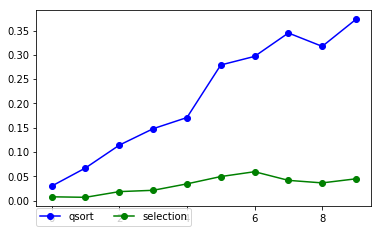

In [46]:
import matplotlib.pyplot as plt


# Make a figure
fig = plt.figure()

# Make room for legend at bottom
fig.subplots_adjust(bottom=0.2)

# The axes for your lists 1-2
ax1 = fig.add_subplot(111)


# Plot lines 
line1 = ax1.plot(t1,'bo-',label='qsort')  # plot t1
line2 = ax1.plot(t2,'go-',label='selection')      # plot t2


# To get lines 1-2 on the same legend, we need to 
# gather all the lines together before calling legend
lines = line1+line2
labels = [l.get_label() for l in lines]

# giving loc a tuple in axes-coords. ncol=5 for 5 columns
ax1.legend(lines, labels, loc=(0,-.1), ncol=5)

#ax1.set_xlabel('events')

# Display the figure
plt.show()